In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Dataset paths
train_dataset_path = r"D:\python\ML\Campus_dataset\train"
test_dataset_path = r"D:\python\ML\Campus_dataset\test"

# Image parameters
img_width, img_height = 256, 256
batch_size = 32

# Define ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.6, 1.4],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # 20% data for validation
)

# Load Training Data (80%)
train_dataset = train_datagen.flow_from_directory(
    directory=train_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data (20%)
val_dataset = train_datagen.flow_from_directory(
    directory=train_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Print class names
num_classes = len(train_dataset.class_indices)
print(f"Number of classes: {num_classes}")
print("Class names:", list(train_dataset.class_indices.keys()))
print(f"Class labels: {train_dataset.class_indices}")


Found 1056 images belonging to 10 classes.
Found 258 images belonging to 10 classes.
Number of classes: 10
Class names: ['Boys_Hostel', 'Cids', 'Computer_Science_and_Engineer', 'HCC', 'MACS', 'Main_Building', 'Mega_Tower_Boys_Hostle', 'Science', 'Sport', 'Trishul_Boys_Hostle']
Class labels: {'Boys_Hostel': 0, 'Cids': 1, 'Computer_Science_and_Engineer': 2, 'HCC': 3, 'MACS': 4, 'Main_Building': 5, 'Mega_Tower_Boys_Hostle': 6, 'Science': 7, 'Sport': 8, 'Trishul_Boys_Hostle': 9}


In [3]:

# Load EfficientNetV2-S pre-trained on ImageNet
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze the base model

# Create the custom model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 8, 8, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,202 (80.58 MB)

 Trainable params: 791,306 (3.02 MB)

 Non-trainable params: 20,332,896 (77.56 MB)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 179s 5s/step - accuracy: 0.1383 - loss: 3.1076 - val_accuracy: 0.2171 - val_loss: 2.2785
Epoch 2/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.1992 - loss: 2.5869 - val_accuracy: 0.2248 - val_loss: 2.2378
Epoch 3/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.2190 - loss: 2.4795 - val_accuracy: 0.2054 - val_loss: 2.1952
Epoch 4/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.2253 - loss: 2.3257 - val_accuracy: 0.2597 - val_loss: 2.1288
Epoch 5/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 210s 6s/step - accuracy: 0.2381 - loss: 2.3400 - val_accuracy: 0.1705 - val_loss: 2.1541
Epoch 6/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 224s 7s/step - accuracy: 0.2729 - loss: 2.2066 - val_accuracy: 0.2209 - val_loss: 2.1294
Epoch 7/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.2479 - loss: 2.2403 - val_accuracy: 0.2016 - val_loss: 2.1279
Epoch 8/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.2775 - loss: 2.2174 - val_accuracy: 0.2248 - v

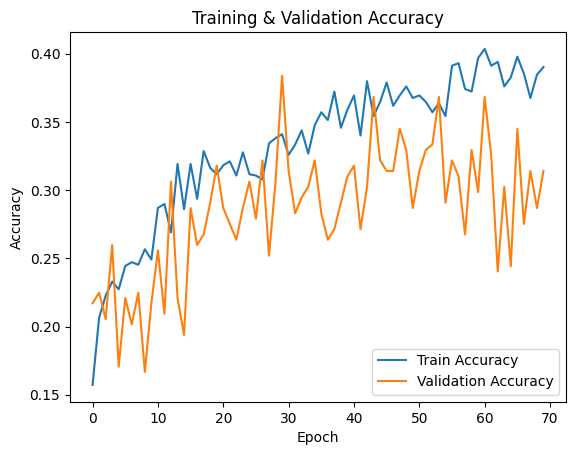

In [4]:

# Train the model
history = model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset
)

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')
plt.show()

Epoch 1/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 408s 11s/step - accuracy: 0.3141 - loss: 2.1573 - val_accuracy: 0.1822 - val_loss: 2.6442
Epoch 2/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 339s 10s/step - accuracy: 0.6709 - loss: 1.0493 - val_accuracy: 0.6085 - val_loss: 1.2111
Epoch 3/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 340s 10s/step - accuracy: 0.8200 - loss: 0.7080 - val_accuracy: 0.8566 - val_loss: 0.5643
Epoch 4/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 339s 10s/step - accuracy: 0.9254 - loss: 0.4714 - val_accuracy: 0.9031 - val_loss: 0.4046
Epoch 5/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 338s 10s/step - accuracy: 0.9381 - loss: 0.3433 - val_accuracy: 0.9186 - val_loss: 0.3730
Epoch 6/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 340s 10s/step - accuracy: 0.9728 - loss: 0.2298 - val_accuracy: 0.9302 - val_loss: 0.2899
Epoch 7/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 338s 10s/step - accuracy: 0.9828 - loss: 0.1759 - val_accuracy: 0.9380 - val_loss: 0.2741
Epoch 8/12
33/33 ━━━━━━━━━━━━━━━━━━━━ 340s 10s/step - accuracy: 0.9854 - loss: 0.1506 - val_accuracy: 0.

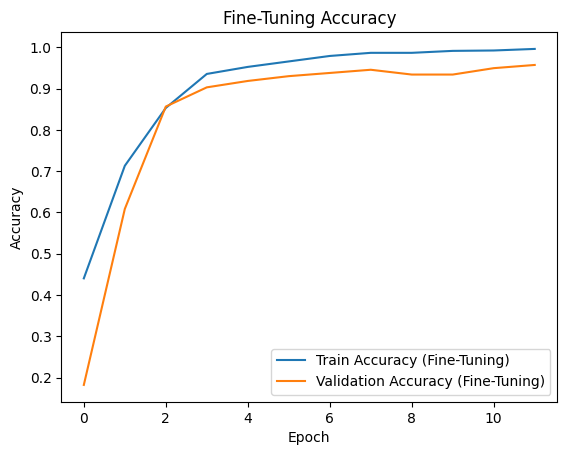

In [5]:

# Unfreeze base model for fine-tuning
base_model.trainable = True

# Compile with lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train again with fine-tuning
history_fine = model.fit(
    train_dataset,
    epochs=12,
    validation_data=val_dataset
)

# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_dataset)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

# Plot fine-tuning accuracy
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (Fine-Tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (Fine-Tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Fine-Tuning Accuracy')
plt.show()

In [6]:
model.save("NitkLandScape9.h5")

# Convert to TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('nitk_landscape_lite9.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model converted successfully')

INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpvzho7ial\assets


INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpvzho7ial\assets


Saved artifact at 'C:\Users\LENOVO\AppData\Local\Temp\tmpvzho7ial'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_513')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  3105118677024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118752608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118757712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118750496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118756304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118762816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118761056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118761584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118760176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3105118759824: TensorSpec(shape=(), dtype=tf.resource, name=None)
 

Found 100 images belonging to 10 classes.


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


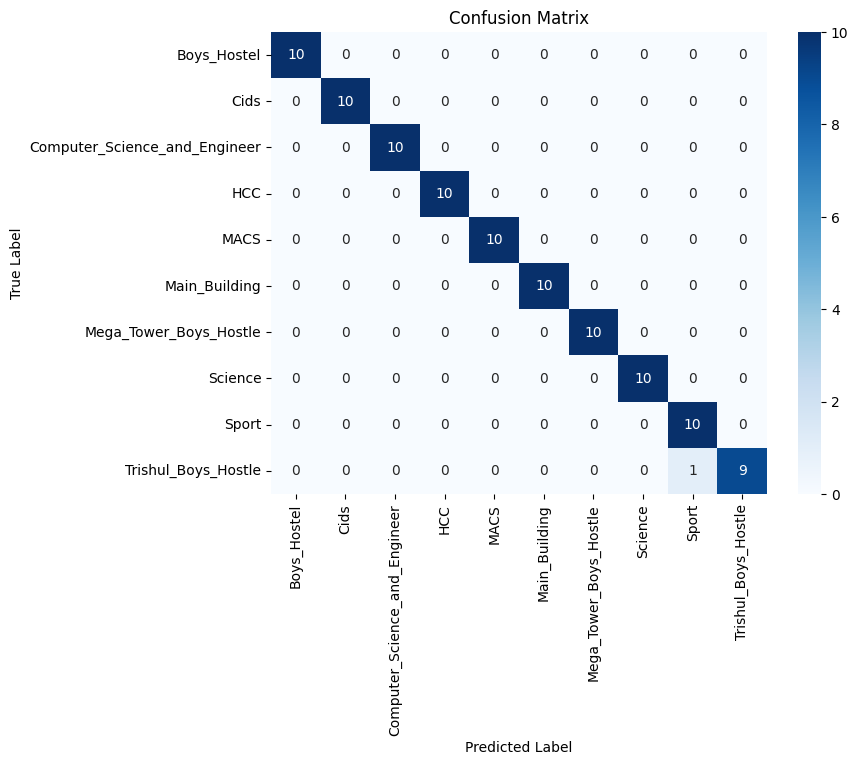

Classification Report:
                               precision    recall  f1-score   support

                  Boys_Hostel       1.00      1.00      1.00        10
                         Cids       1.00      1.00      1.00        10
Computer_Science_and_Engineer       1.00      1.00      1.00        10
                          HCC       1.00      1.00      1.00        10
                         MACS       1.00      1.00      1.00        10
                Main_Building       1.00      1.00      1.00        10
       Mega_Tower_Boys_Hostle       1.00      1.00      1.00        10
                      Science       1.00      1.00      1.00        10
                        Sport       0.91      1.00      0.95        10
          Trishul_Boys_Hostle       1.00      0.90      0.95        10

                     accuracy                           0.99       100
                    macro avg       0.99      0.99      0.99       100
                 weighted avg       0.99      0.99  

In [7]:


# Save the model


# ========== CONFUSION MATRIX ON TEST DATA ==========

# Define ImageDataGenerator for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Test Data
test_dataset = test_datagen.flow_from_directory(
    directory=test_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct label mapping
)

# Load the trained model
model = tf.keras.models.load_model("NitkLandScape9.h5")

# Make predictions
predictions = model.predict(test_dataset)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)  # Get class index with highest probability
y_true = test_dataset.classes  # True labels

# Get class names
class_labels = list(test_dataset.class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))
